# Đặt câu hỏi

Notebook này thực hiện việc phân tích và đặt câu hỏi, visualization.

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Đọc file dữ liệu

Dữ liệu của chúng ta được lưu trong file 'Anime.csv'. Chúng ta sẽ đọc dữ liệu và lưu vào DataFrame `data_df`

In [2]:
data_df = pd.read_csv('anime_after_preproc.csv')
data_df.head(5)
#Hiển thị 5 dòng đầu xem dữ liệu đọc đã đúng chưa

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,2015-10-05,...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,2012-07-08,...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


### Câu hỏi 1: Chủ đề nào thường có những phim hay ?

Trả lời câu hỏi trên sẽ giúp những người đang tìm kiếm anime hay để xem sẽ có những gợi ý rõ ràng hơn để tìm kiếm phim xem.

Để đánh giá một bộ phim có hay hay là không thì mỗi nơi, mỗi người sẽ có cách đánh giá khác nhau. Đối với nhóm, một bộ phim được xem là hay nếu nó nằm trong 10% có điểm cao nhất và số người thêm nó vào danh sách anime của mình phải lớn hơn 100000 (để đảm bảo kết quả đánh giá là chính xác). 

Như đã nói trên, một bộ phim hay thì không chỉ phụ thuộc vào số điểm mà còn phụ thuộc vào số người thêm nó vào danh sách anime của mình. Vì vậy để trả lời câu hỏi này thì cần phải nêu rõ số bộ phim anime hay ứng với mỗi chủ đề và số thành viên trung bình của các bộ phim đó

Đầu tiên, ta phải lọc các bộ anime thỏa mãn điều kiện trên

In [3]:
high_score = data_df["Score"].quantile(0.9)
ques1_df = data_df[data_df['Score'] >= high_score ]
ques1_df = ques1_df[ques1_df["Members"] > 100000]

In [4]:
ques1_df["Themes"] = ques1_df['Themes'].str.split(', ')

In [5]:
themes_explode = ques1_df.explode("Themes")
#Loại bỏ các themes là Unknown
themes_explode = themes_explode[themes_explode['Themes'] != 'Unknown']
themes_explode.head(5)
#Xem thử kết quả sau khi explode

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,Gore,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,Military,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,Survival,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772


Tiếp theo, cần tính số thành viên trung bình của các bộ phim theo chủ đề

In [6]:
avg_member_by_theme = themes_explode.groupby("Themes")['Members'].mean().astype(int).sort_values(ascending = False)
avg_member_by_theme.head(15)

Themes
Survival            1206873
Gore                 931774
Time Travel          827691
Super Power          681498
Psychological        657617
Military             656020
Romantic Subtext     655133
Martial Arts         625931
Crossdressing        624942
Reincarnation        602629
Medical              594921
Educational          594921
Isekai               592563
Delinquents          591162
Video Game           578045
Name: Members, dtype: int64

Tiếp theo, ta tính số bộ phim hay ứng với mỗi chủ đề

In [7]:
highscore_by_theme = themes_explode.groupby('Themes')['Score'].count().sort_values(ascending = False)
highscore_by_theme.head(15)

Themes
School           187
Psychological     77
Historical        72
Adult Cast        58
Mythology         57
Super Power       56
Military          50
Isekai            48
Gag Humor         43
Mecha             37
Iyashikei         36
Music             34
Parody            30
Love Polygon      28
Gore              27
Name: Score, dtype: int64

Cuối cùng, vẽ biểu đồ.

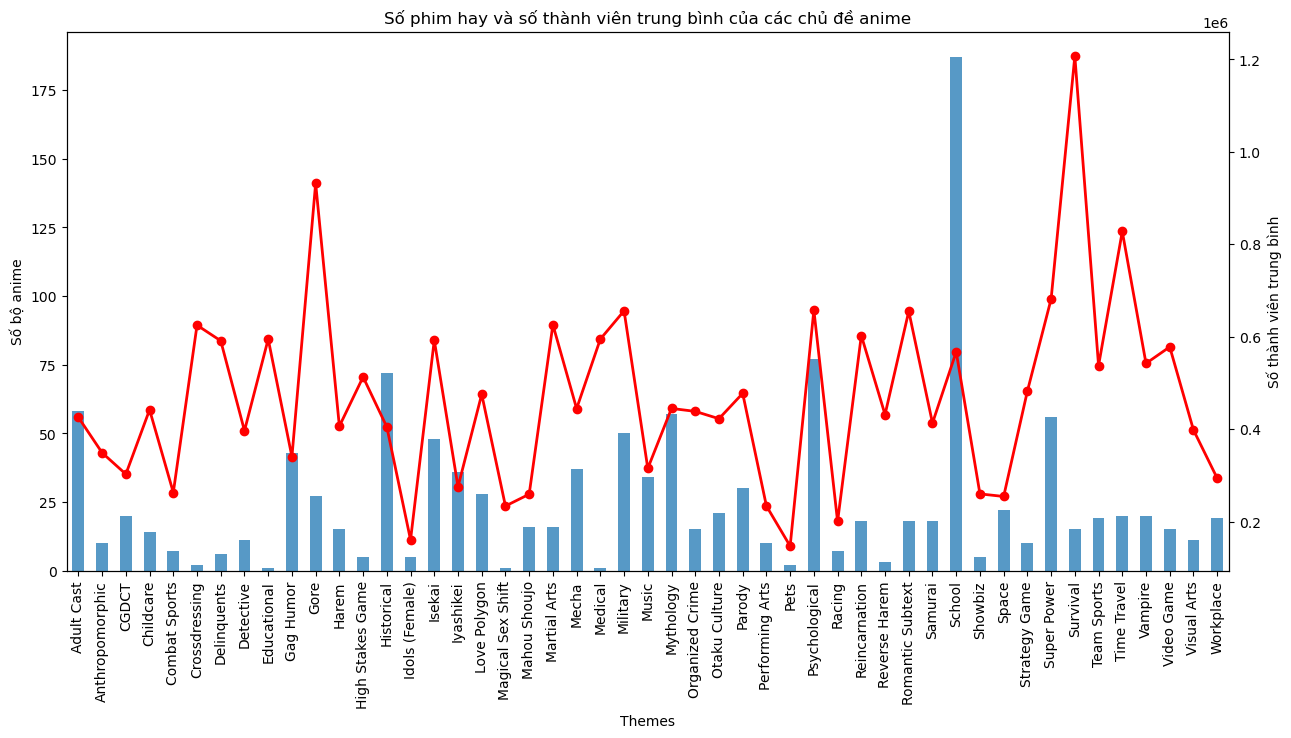

In [8]:
highscore_by_theme = highscore_by_theme.sort_index()
avg_member_by_theme = avg_member_by_theme.sort_index()
#Vẽ biêu đồ
fig = plt.figure(figsize = (15,7))
ax1 = (highscore_by_theme).plot(kind = 'bar', rot = 90, alpha = 0.75)
ax1.set_ylabel("Số bộ anime")

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), avg_member_by_theme, linestyle='-',  
         marker='o', linewidth=2.0, color = 'red')
ax2.set_ylabel('Số thành viên trung bình')
plt.title("Số phim hay và số thành viên trung bình của các chủ đề anime")


plt.show()

Nhận xét:
- Chủ đề survival và gore có số phim hay không nhiều, nhưng số thành viên trung bình của nó rất cao, chứng tỏ mọi người đều rất hóng những bộ phim có chủ đề như thế này (Ít bộ nhưng bộ nào chất bộ đó)
- Chủ đề School có cực kỳ nhiều phim hay, ai đang rảnh thì có thể cày phim của chủ đề này.
- Chủ đề idol (Female) và Chủ đề pets có không có nhiều phim hay lắm, mà có thì số thành viên thêm nó vào danh sách của mình cũng rất ít, có lẽ sẽ nên xem các phim khác hơn.
- Ba thể loại Historical, Pssychological, School là 3 thể loại có nhiều phim hay nhất.
- Ba thể loại Survial, Gore, Time Travel là 3 thể loại được hóng nhất (số thành viên đông nhất).
- Biểu đồ của số thành viên trung bình và số phim hay rất khác nhau, không phải chủ đề nào có nhiều phim hay thì chủ đề đó được nhiều thành viên chú ý. 